In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Leer archivos CSV
calendar = pd.read_csv('m5-forecasting-accuracy/calendar.csv')
sales_train_val = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
sell_prices = pd.read_csv('m5-forecasting-accuracy/sell_prices.csv')

In [4]:
# Verificar valores nulos y rellenarlos con N/A
print(calendar.isnull().sum())
calendar.fillna('N/A', inplace=True)

# Convertir la columna 'd' para que tenga el tipo de dato entero
calendar['d'] = calendar['d'].str.replace('d_', '').astype(int)
print(calendar.dtypes)
calendar.head()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64
date            object
wm_yr_wk         int64
weekday         object
wday             int64
month            int64
year             int64
d                int32
event_name_1    object
event_type_1    object
event_name_2    object
event_type_2    object
snap_CA          int64
snap_TX          int64
snap_WI          int64
dtype: object


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,1,N/A,N/A,N/A,N/A,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,2,N/A,N/A,N/A,N/A,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,3,N/A,N/A,N/A,N/A,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,4,N/A,N/A,N/A,N/A,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,5,N/A,N/A,N/A,N/A,1,0,1


In [15]:
# Revisar si hay valores nulos
nulos = sales_train_val.isnull().sum().sum()
print(f"Valores nulos en sales_train_val: {nulos}")  # Debería ser 0

Valores nulos en sales_train_val: 0


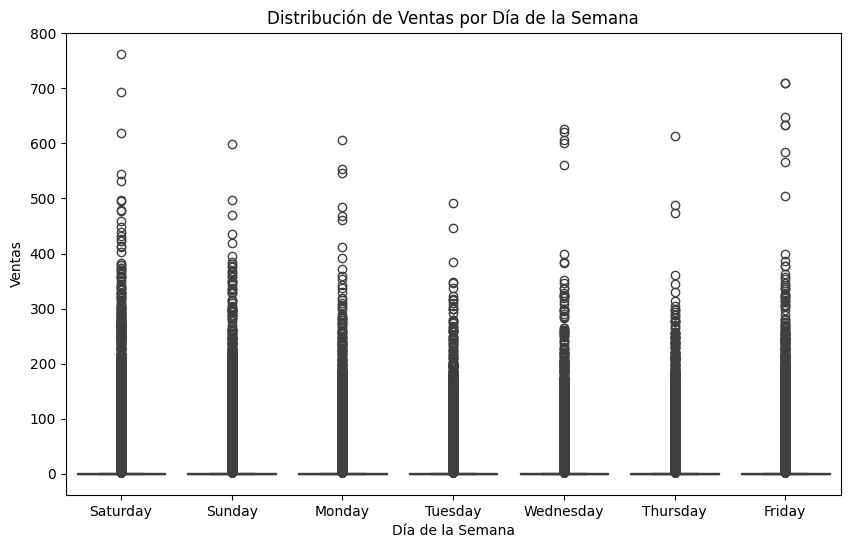

In [14]:
# Preparar los datos para unir con calendario
ventas_long = sales_train_val.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                                   var_name='d', 
                                   value_name='sales')
ventas_long['d'] = ventas_long['d'].str.replace('d_', '').astype(int)
calendar['d'] = calendar['d'].astype(int)

# Unir ventas y calendario
ventas_long = pd.merge(ventas_long, calendar[['d', 'weekday']], on='d', how='left')

# Crear boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='sales', data=ventas_long)
plt.title('Distribución de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas')
plt.show()


In [6]:
# Revisar valores nulos
print(sell_prices.isnull().sum())

# Revisar estadísticos descriptivos de los precios
print(sell_prices['sell_price'].describe())

# Asegurarse de que 'wm_yr_wk' es int y 'sell_price' es float
sell_prices['wm_yr_wk'] = sell_prices['wm_yr_wk'].astype(int)
sell_prices['sell_price'] = sell_prices['sell_price'].astype(float)

# Verificar el resultado
sell_prices.head()


store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64
count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
